# Xarray tutorial 

## In this jupyter notebook, we will go over some of the basic features that xarray has to offer and how you can utilize them to inspect your dataset, compute some basic statistics, and plot some basic gridded data
## Xarray makes working with large datasets that are gridded or have multiple underlying arrays as their structure a breeze. It is wonderful for working with common filetypes such as NetCDF files, GRIB2 files, and other types of files that are commonly used in atmospheric science

# First we need to import xarray and a few other dependencies to analyze our data            

In [85]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import numpy as np


# What data will we be using for this?

## A great dataset to start off with would be some very basic model data. For this example, we will be using a GRIB2 file containing data from the Global Ensemble Forecast System (GEFSv12) model. This file is the control member

### To open a dataset we use the function xr.open_dataset("Name of dataset", engine='what type of file is this? For NetCDFs, engine='netcdf4', for grib2 files, engine='cfgrib')

In [2]:
data = xr.open_dataset('model/gec00.t12z.pgrb2a.0p50.f000',engine='cfgrib')


skipping variable: paramId==130 shortName='t'
Traceback (most recent call last):
  File "/home/bweart1/.local/lib/python3.12/site-packages/cfgrib/dataset.py", line 725, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/bweart1/.local/lib/python3.12/site-packages/cfgrib/dataset.py", line 641, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='isobaricInhPa' value=Variable(dimensions=('isobaricInhPa',), data=array([1000.,  925.,  850.,  700.,  500.,  300.,  250.,  200.,  100.,
         50.,   10.])) new_value=Variable(dimensions=('isobaricInhPa',), data=array([1000.,  925.,  850.,  700.,  500.,  250.,  200.,  100.,   50.,
         10.]))
skipping variable: paramId==157 shortName='r'
Traceback (most recent call last):
  File "/home/bweart1/.local/lib/python3.12/site-packages/cfgrib/dataset.py", line 725, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/bweart

# Now that we have our dataset set as a variable abtly named data, lets inspect it to see what our file looks like!

In [3]:
data

<xarray.Dataset> Size: 25MB
Dimensions:                  (isobaricInhPa: 11, latitude: 361, longitude: 720)
Coordinates: (12/13)
    number                   int64 8B ...
    time                     datetime64[ns] 8B ...
    step                     timedelta64[ns] 8B ...
  * isobaricInhPa            (isobaricInhPa) float64 88B 1e+03 925.0 ... 10.0
  * latitude                 (latitude) float64 3kB 90.0 89.5 ... -89.5 -90.0
  * longitude                (longitude) float64 6kB 0.0 0.5 1.0 ... 359.0 359.5
    ...                       ...
    surface                  float64 8B ...
    depthBelowLandLayer      float64 8B ...
    heightAboveGround        float64 8B ...
    atmosphereSingleLayer    float64 8B ...
    pressureFromGroundLayer  float64 8B ...
    meanSea                  float64 8B ...
Data variables: (12/14)
    gh                       (isobaricInhPa, latitude, longitude) float32 11MB ...
    sp                       (latitude, longitude) float32 1MB ...
    orog                     (latitude, longitude) float32 1MB ...
    st                       (latitude, longitude) float32 1MB ...
    soilw                    (latitude, longitude) float32 1MB ...
    sdwe                     (latitude, longitude) float32 1MB ...
    ...                       ...
    t2m                      (latitude, longitude) float32 1MB ...
    r2                       (latitude, longitude) float32 1MB ...
    pwat                     (latitude, longitude) float32 1MB ...
    cape                     (latitude, longitude) float32 1MB ...
    cin                      (latitude, longitude) float32 1MB ...
    prmsl                    (latitude, longitude) float32 1MB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          2
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    history:                 2025-02-03T05:39 GRIB to CDM+CF via cfgrib-0.9.1...

# Some super important things to note here! 
## We notice a cooridnate box with 13 different options listed. These coordinates represent different values relevant to the variables themselves or general information for the dataset.
## You'll notice that 3 of the coordinates (latitude, longitude, isobarichInhPa) are also listed as dimensions. These coordinates provide spatial information to the variables.
## The data variables themselves are underlying arrays that have a value at each grid point (the placement of each grid point is determined by their dimensions). 
## You'll also notice the small icons next to each line in the dataset. These provide some metadata to the user regarding what the variable is, what its units are, and other important information

<img src="mkdwn.png" alt='varinfo' width='700'/>

## Lets work with the t2m variable

# To directly work with the t2m variable, lets create a variable called t2m and set it equal to the underlying array corresponding with t2m. 

In [4]:
t2m = data.t2m.values

## Printing out the t2m variable, we can see that we have an array of values of temperature in Kelvin.
### Before we make a fancy plot, lets see how the data **should** look

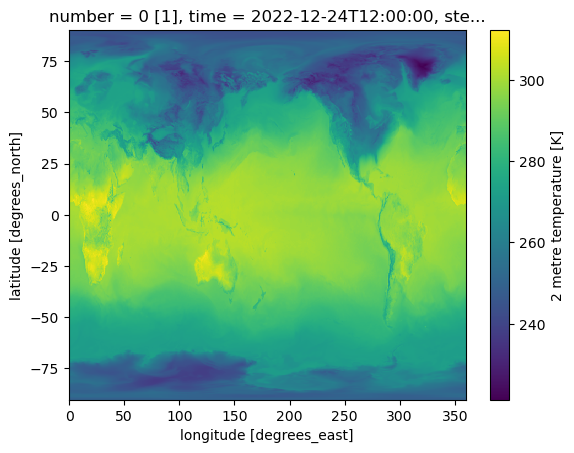

In [5]:
data.t2m.plot()

# Now doesnt this look fancy? .plot() is a built in function to xarray that allows you to make an on-the-fly plot of the data. You can add arguments to this as well as shown below

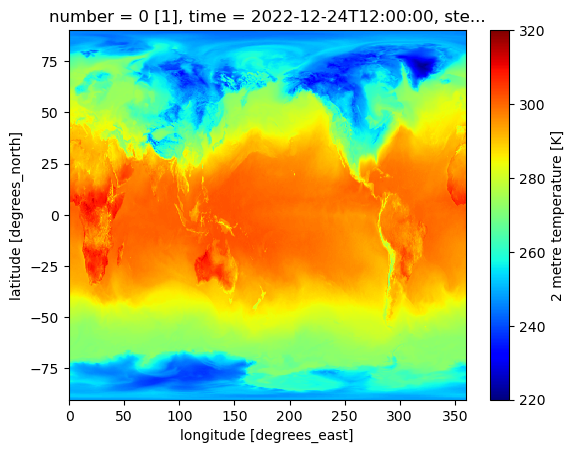

In [6]:
data.t2m.plot(vmin=220, vmax = 320, cmap='jet')

# Super nice isnt it? But now comes the fun part. We live in the United States so the most relevant portion of our data would fall there. And that's where we'd like to look! Let's make a custom fancy plot based on the matplotlib and cartopy you learned earlier!


## Remember those coordinates? Lets set variables equaL to the values of latitude and longitude. When plotting data like this, you need to make sure that you pass in x and y for the data so that the right values are in the right gridcells!


# Before we do that, we might notice that our longitude goes from 0-360, which will be problematic for plotting as you will be plotting data from another part of the world over the U.S. as the coordinates are not the same. We want to convert them to 180,-180 so we can effectively plot. 
# Here we will use the assign_coords function built into xarray to reassign the updated longitude values to the longutide coordinates

In [7]:
data = data.assign_coords(longitude=((data.longitude + 180) % 360) - 180)

In [32]:
lat = data.latitude.values
lon = data.longitude.values

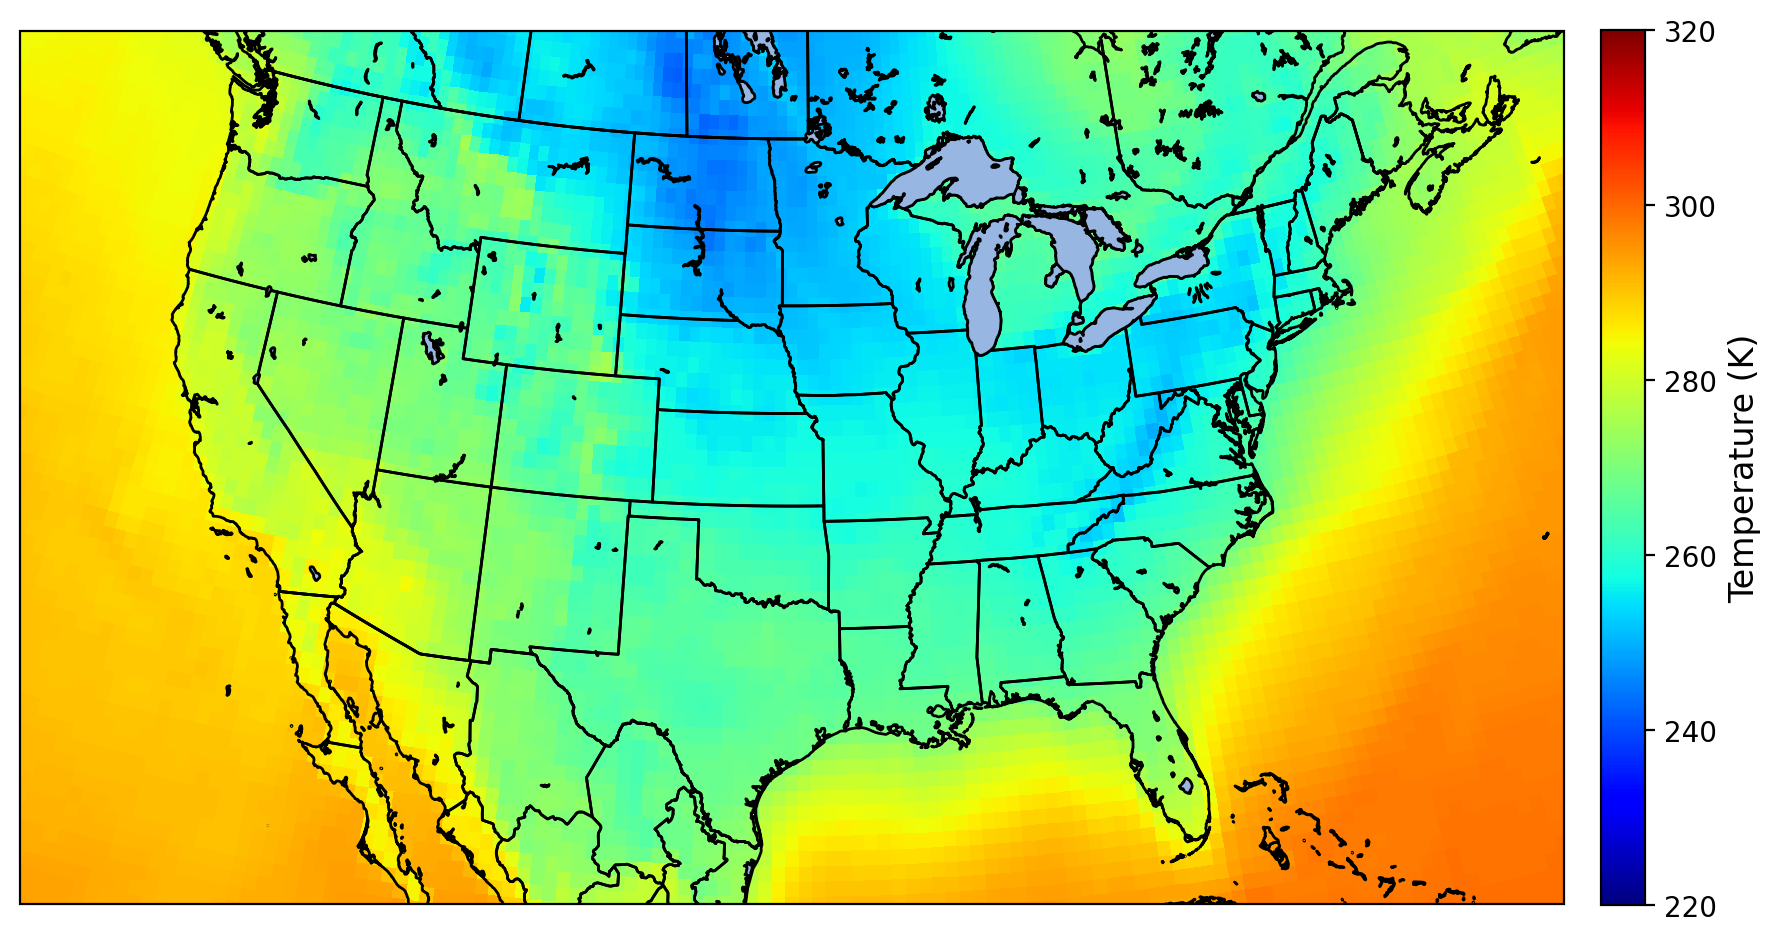

In [9]:
fig,ax = plt.subplots(1,1,dpi=200,figsize=(12,8), subplot_kw={'projection':ccrs.AlbersEqualArea(central_longitude=-96,central_latitude=37.5)})

# Cartopy Features
ax.set_extent([-125, -67, 24, 50], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.BORDERS.with_scale('10m'), linewidth=1)
ax.add_feature(cfeature.STATES.with_scale('10m'), linewidth=1)
ax.add_feature(cfeature.OCEAN.with_scale('10m'), facecolor='lightblue') 
# ax.add_feature(cfeature.LAND.with_scale('10m'), facecolor='none', edgecolor='black') 
ax.add_feature(cfeature.LAKES.with_scale('10m'), edgecolor='black')  # Lake outlines

temp = ax.pcolormesh(lon,lat, t2m, vmin = 220, vmax = 320, cmap='jet', transform=ccrs.PlateCarree())
cbar = plt.colorbar(temp, ax=ax, orientation='vertical', shrink=0.71, pad=0.02)
cbar.set_label("Temperature (K)", fontsize=12)
plt.show()


# Lets be even more fancy and make a plotting function! Maybe we can use some of the other data!!

In [67]:
def plotting(data, lat, lon,dpi, vmin=None, vmax=None, cmap=None):
    fig,ax = plt.subplots(1,1,dpi=dpi,figsize=(12,8), subplot_kw={'projection':ccrs.AlbersEqualArea(central_longitude=-96,central_latitude=37.5)})

    ax.set_extent([-125, -67, 24, 50], crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.BORDERS.with_scale('10m'), linewidth=1)
    ax.add_feature(cfeature.STATES.with_scale('10m'), linewidth=1)
    ax.add_feature(cfeature.OCEAN.with_scale('10m'), facecolor='lightblue') 
    ax.add_feature(cfeature.LAND.with_scale('10m'), facecolor='none', edgecolor='black') 
    ax.add_feature(cfeature.LAKES.with_scale('10m'), edgecolor='black')  # Lake outlines
    
    plot_var = ax.pcolormesh(lon,lat, data, vmin = vmin, vmax = vmax, cmap=cmap, transform=ccrs.PlateCarree())
    cbar = plt.colorbar(plot_var, ax=ax, orientation='vertical', shrink=0.71, pad=0.02)
    cbar.set_label("Temperature (K)", fontsize=12)
    plt.show()
    

# Lets see how it works!

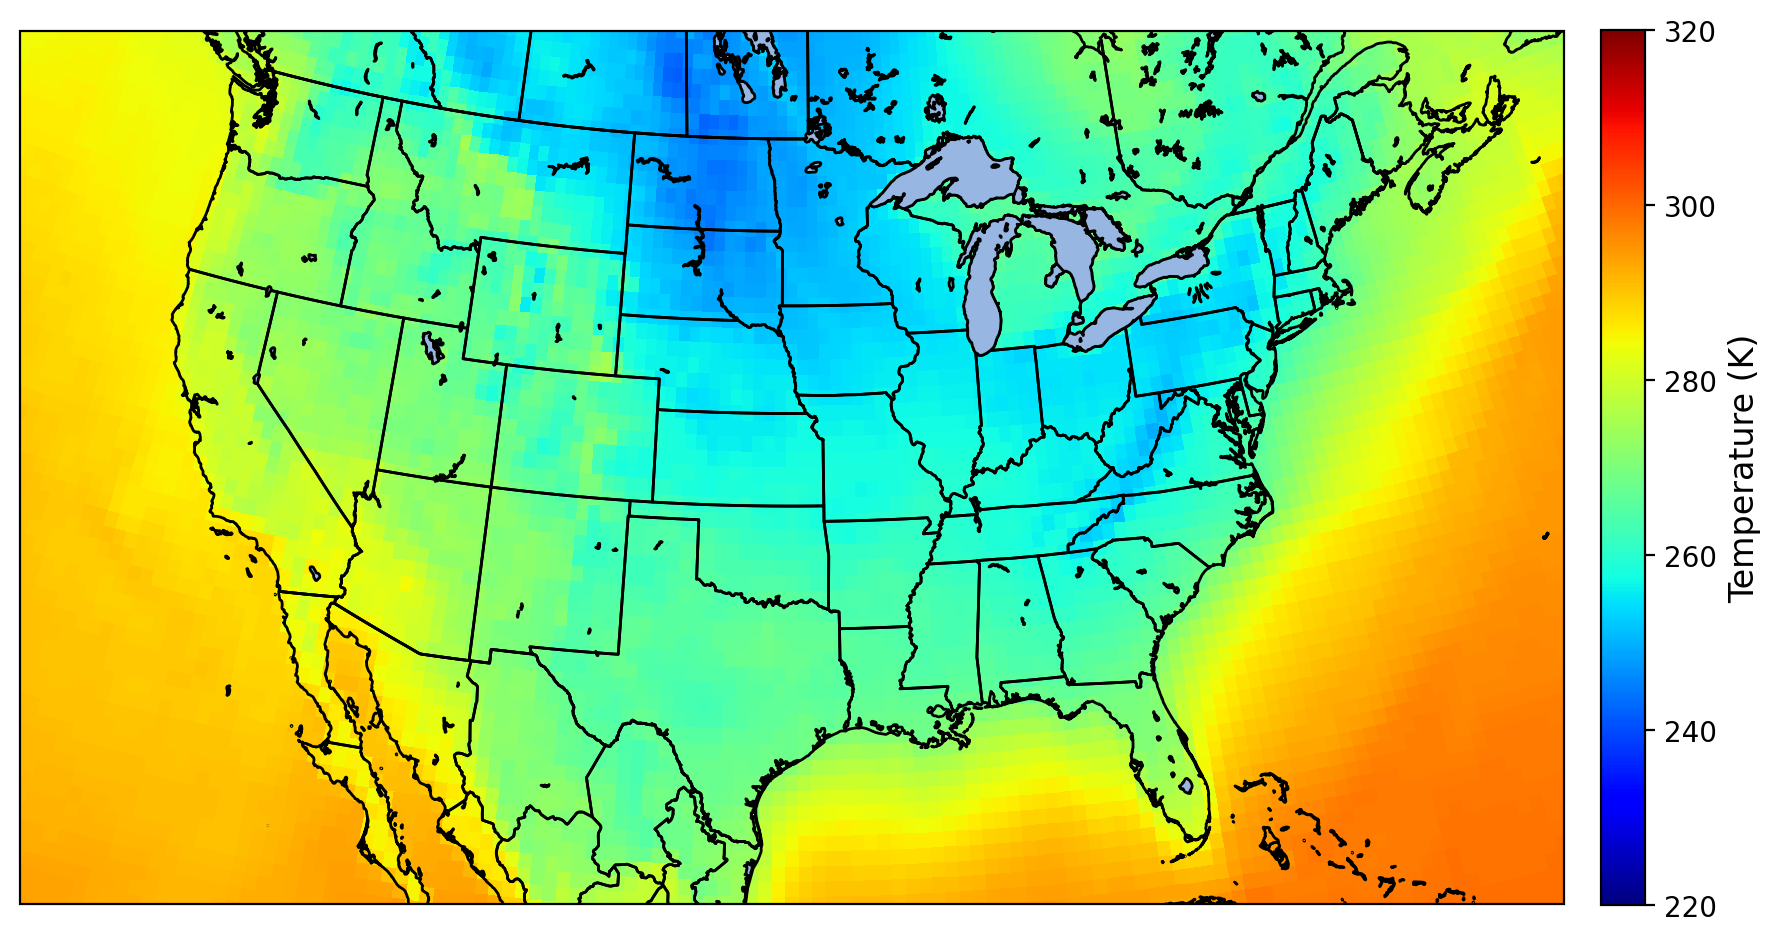

In [68]:
plotting(t2m, lat, lon,dpi=200, vmin=220, vmax=320, cmap='jet')

# Looks good! Lets mess around with one more thing! Lets try masking the data to only the United States
## We could simply slice the data by lontitude and latitude to get a rough mask

In [69]:
new_data = data.sel(latitude=slice(50, 24), longitude=slice(-125, -67))


In [70]:
t2m_masked = new_data.t2m.values

In [71]:
lat_m = new_data.latitude.values
lon_m = new_data.longitude.values

In [72]:
new_data

<xarray.Dataset> Size: 597kB
Dimensions:                  (isobaricInhPa: 11, latitude: 53, longitude: 117)
Coordinates: (12/13)
    number                   int64 8B 0
    time                     datetime64[ns] 8B 2022-12-24T12:00:00
    step                     timedelta64[ns] 8B 00:00:00
  * isobaricInhPa            (isobaricInhPa) float64 88B 1e+03 925.0 ... 10.0
  * latitude                 (latitude) float64 424B 50.0 49.5 ... 24.5 24.0
    valid_time               datetime64[ns] 8B 2022-12-24T12:00:00
    ...                       ...
    depthBelowLandLayer      float64 8B 0.0
    heightAboveGround        float64 8B 2.0
    atmosphereSingleLayer    float64 8B 0.0
    pressureFromGroundLayer  float64 8B 1.8e+04
    meanSea                  float64 8B 0.0
  * longitude                (longitude) float64 936B -125.0 -124.5 ... -67.0
Data variables: (12/14)
    gh                       (isobaricInhPa, latitude, longitude) float32 273kB ...
    sp                       (latitude, longitude) float32 25kB ...
    orog                     (latitude, longitude) float32 25kB ...
    st                       (latitude, longitude) float32 25kB ...
    soilw                    (latitude, longitude) float32 25kB ...
    sdwe                     (latitude, longitude) float32 25kB ...
    ...                       ...
    t2m                      (latitude, longitude) float32 25kB 276.9 ... 298.4
    r2                       (latitude, longitude) float32 25kB ...
    pwat                     (latitude, longitude) float32 25kB ...
    cape                     (latitude, longitude) float32 25kB ...
    cin                      (latitude, longitude) float32 25kB ...
    prmsl                    (latitude, longitude) float32 25kB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          2
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    history:                 2025-02-03T05:39 GRIB to CDM+CF via cfgrib-0.9.1...

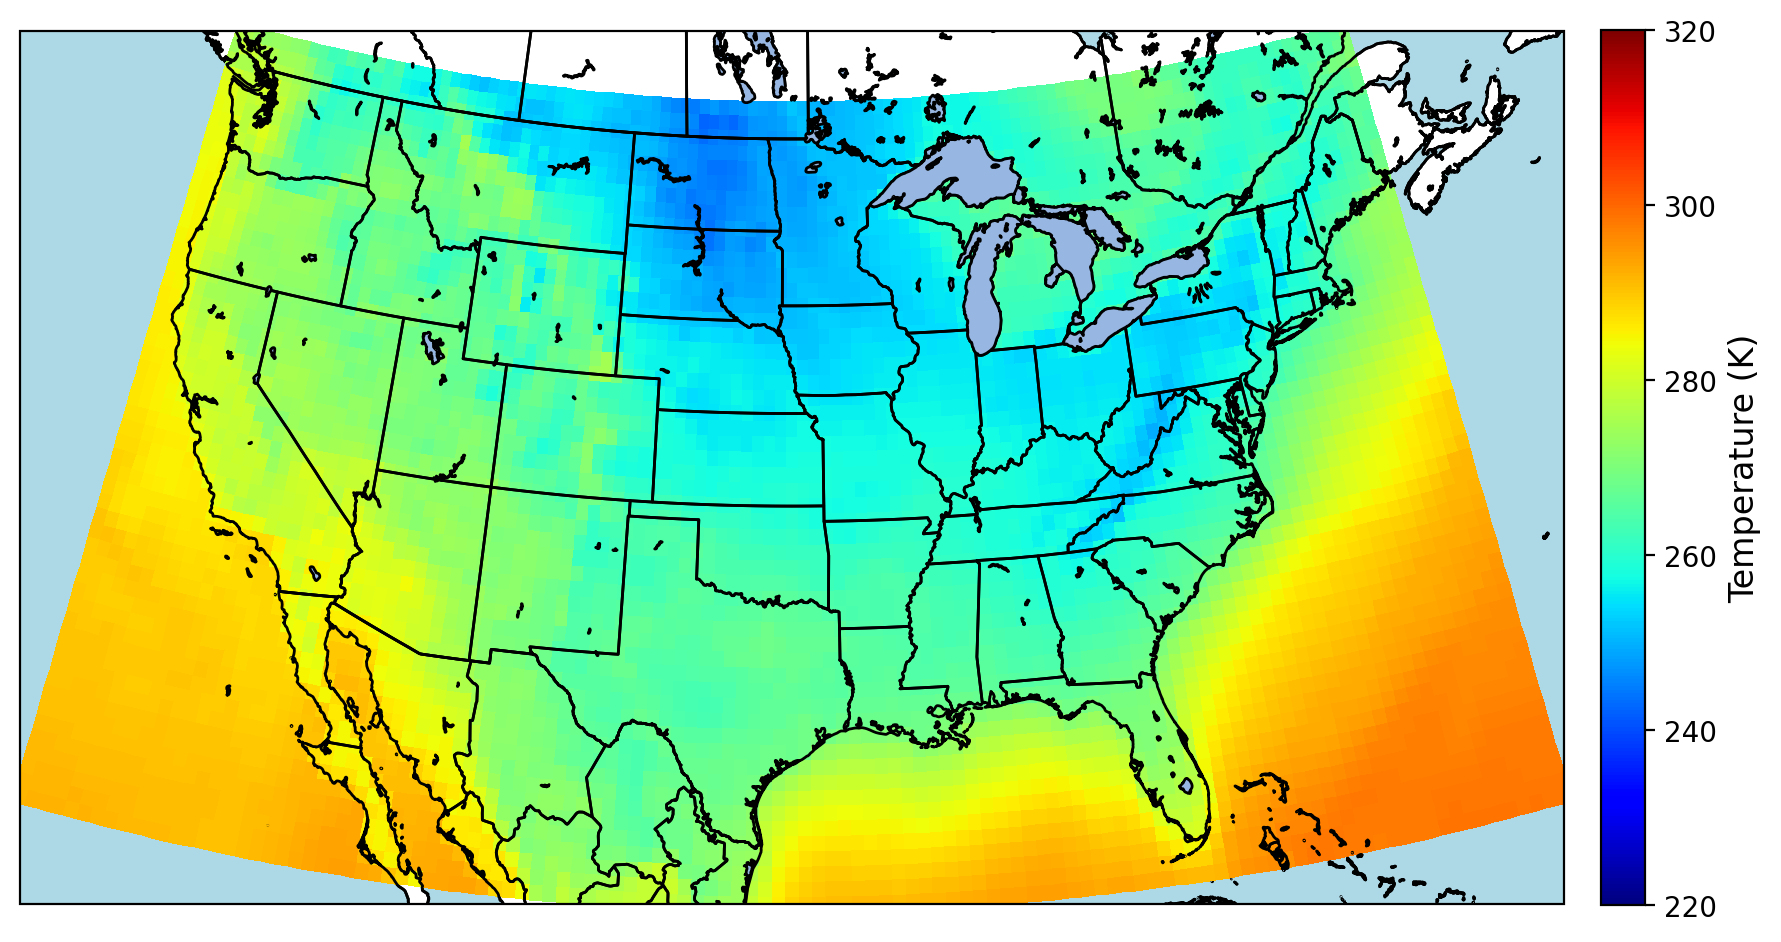

In [73]:
plotting(t2m_masked, lat_m, lon_m,dpi=200, vmin=220, vmax=320, cmap='jet')

# Who likes this though??? doesnt it look ugly? I sure think it does. Lets import a new module called regionmask which we can use in conjunction with xarray to get the job done!

In [74]:
import regionmask
import geopandas

# Now that I have regionmask and its dependency geopandas imported, lets set the mask up! 
## This variable contains a shapefile of the (not just continential) United States. 

In [75]:
region = regionmask.defined_regions.natural_earth_v5_0_0.us_states_10

## To see the states and their corresponding numbers, we can use this statement below to print them

In [76]:
for num, name in zip(region.numbers, region.names):
    print(f"{num}: {name}")

0: Washington
1: Idaho
2: Montana
3: North Dakota
4: Minnesota
5: Michigan
6: Ohio
7: Pennsylvania
8: New York
9: Vermont
10: New Hampshire
11: Maine
12: Arizona
13: California
14: New Mexico
15: Texas
16: Alaska
17: Louisiana
18: Mississippi
19: Alabama
20: Florida
21: Georgia
22: South Carolina
23: North Carolina
24: Virginia
25: District of Columbia
26: Maryland
27: Delaware
28: New Jersey
29: Connecticut
30: Rhode Island
31: Massachusetts
32: Oregon
33: Hawaii
34: Utah
35: Wyoming
36: Nevada
37: Colorado
38: South Dakota
39: Nebraska
40: Kansas
41: Oklahoma
42: Iowa
43: Missouri
44: Wisconsin
45: Illinois
46: Kentucky
47: Arkansas
48: Tennessee
49: West Virginia
50: Indiana


# This variable initializes the mask with the input being the lat lon coordinates

In [77]:
us_mask = region.mask(data.longitude,data.latitude) 

In [78]:
mask

<xarray.DataArray 'mask' (latitude: 361, longitude: 720)> Size: 260kB
array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])
Coordinates:
    number                   int64 8B 0
    time                     datetime64[ns] 8B 2022-12-24T12:00:00
    step                     timedelta64[ns] 8B 00:00:00
  * latitude                 (latitude) float64 3kB 90.0 89.5 ... -89.5 -90.0
    valid_time               datetime64[ns] 8B 2022-12-24T12:00:00
    surface                  float64 8B 0.0
    depthBelowLandLayer      float64 8B 0.0
    heightAboveGround        float64 8B 2.0
    atmosphereSingleLayer    float64 8B 0.0
    pressureFromGroundLayer  float64 8B 1.8e+04
    meanSea                  float64 8B 0.0
  * longitude                (longitude) float64 6kB 0.0 0.5 1.0 ... -1.0 -0.5

# We want to exclude Hawaii and Alaska, so we can set the mask to look for all states except 33 (Hawaii), and 16 (Alaska), while using the rest of the states).

In [79]:
mask = (us_mask != 33) & (us_mask <= 51) & (us_mask != 16)

# With our mask, we can utilize the .where 

In [80]:
masked_data = data.where(mask, drop=True)

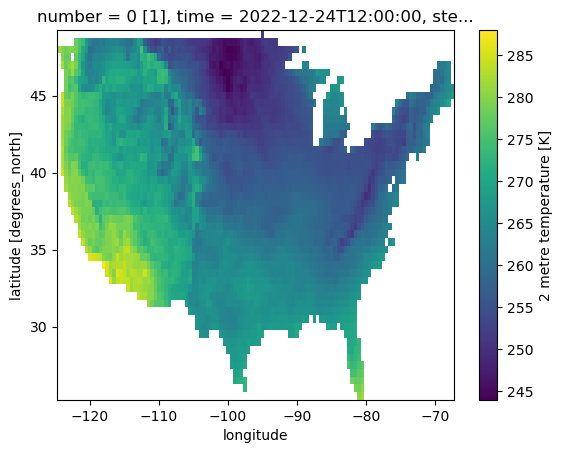

In [81]:
masked_data.t2m.plot()

In [83]:
lat_m = masked_data.latitude.values
lon_m = masked_data.longitude.values
t2m_m = masked_data.t2m.values

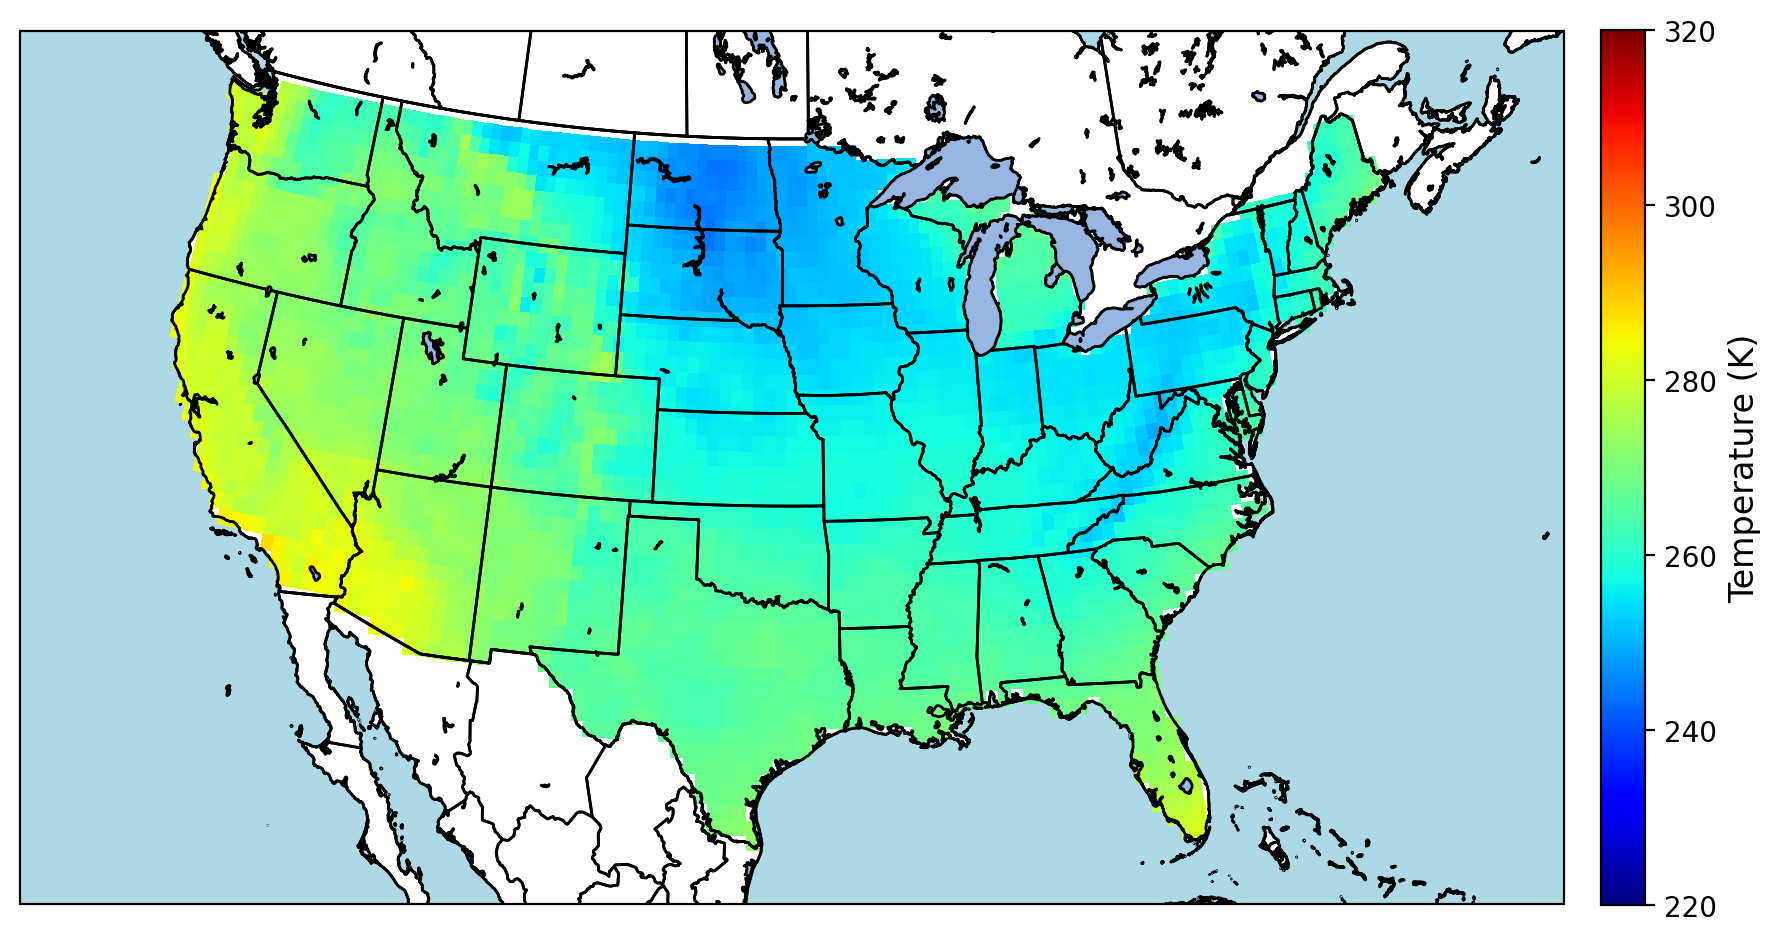

In [141]:
plotting(t2m_m, lat_m, lon_m,dpi=200, vmin=220, vmax=320, cmap='jet')

# For fun, lets modify our plotting function and plot geopotential height at 500 mb in contours as well!

In [198]:
def plotting_multiple(data, data2, lat, lon, dpi=200, vmin=None, vmax=None, cmap=None):
    fig, ax = plt.subplots(1, 1, dpi=dpi, figsize=(12, 8),
                           subplot_kw={'projection': ccrs.AlbersEqualArea(central_longitude=-96, central_latitude=37.5)})

    ax.set_extent([-125, -67, 24, 50], crs=ccrs.PlateCarree())

    ax.add_feature(cfeature.BORDERS.with_scale('10m'), linewidth=1)
    ax.add_feature(cfeature.STATES.with_scale('10m'), linewidth=1)
    ax.add_feature(cfeature.OCEAN.with_scale('10m'), facecolor='lightblue')
    ax.add_feature(cfeature.LAND.with_scale('10m'), facecolor='none', edgecolor='black')
    ax.add_feature(cfeature.LAKES.with_scale('10m'), edgecolor='black')

    cont_levels = np.arange(4960, 6001, 40)

    plot_var = ax.pcolormesh(lon, lat, data, vmin=vmin, vmax=vmax, cmap=cmap, transform=ccrs.PlateCarree())
    contour_var = ax.contour(lon, lat, data2, levels=cont_levels, transform=ccrs.PlateCarree(), colors='k')

    ax.clabel(contour_var, inline=True, fontsize=6, fmt="%d")

    cbar = plt.colorbar(plot_var, ax=ax, orientation='vertical', shrink=0.71, pad=0.02)
    cbar.set_label("Temperature (K)", fontsize=12)

    plt.show()

In [199]:
gh = masked_data.gh.sel(isobaricInhPa=500) # We need to convert this to hPa from Pa

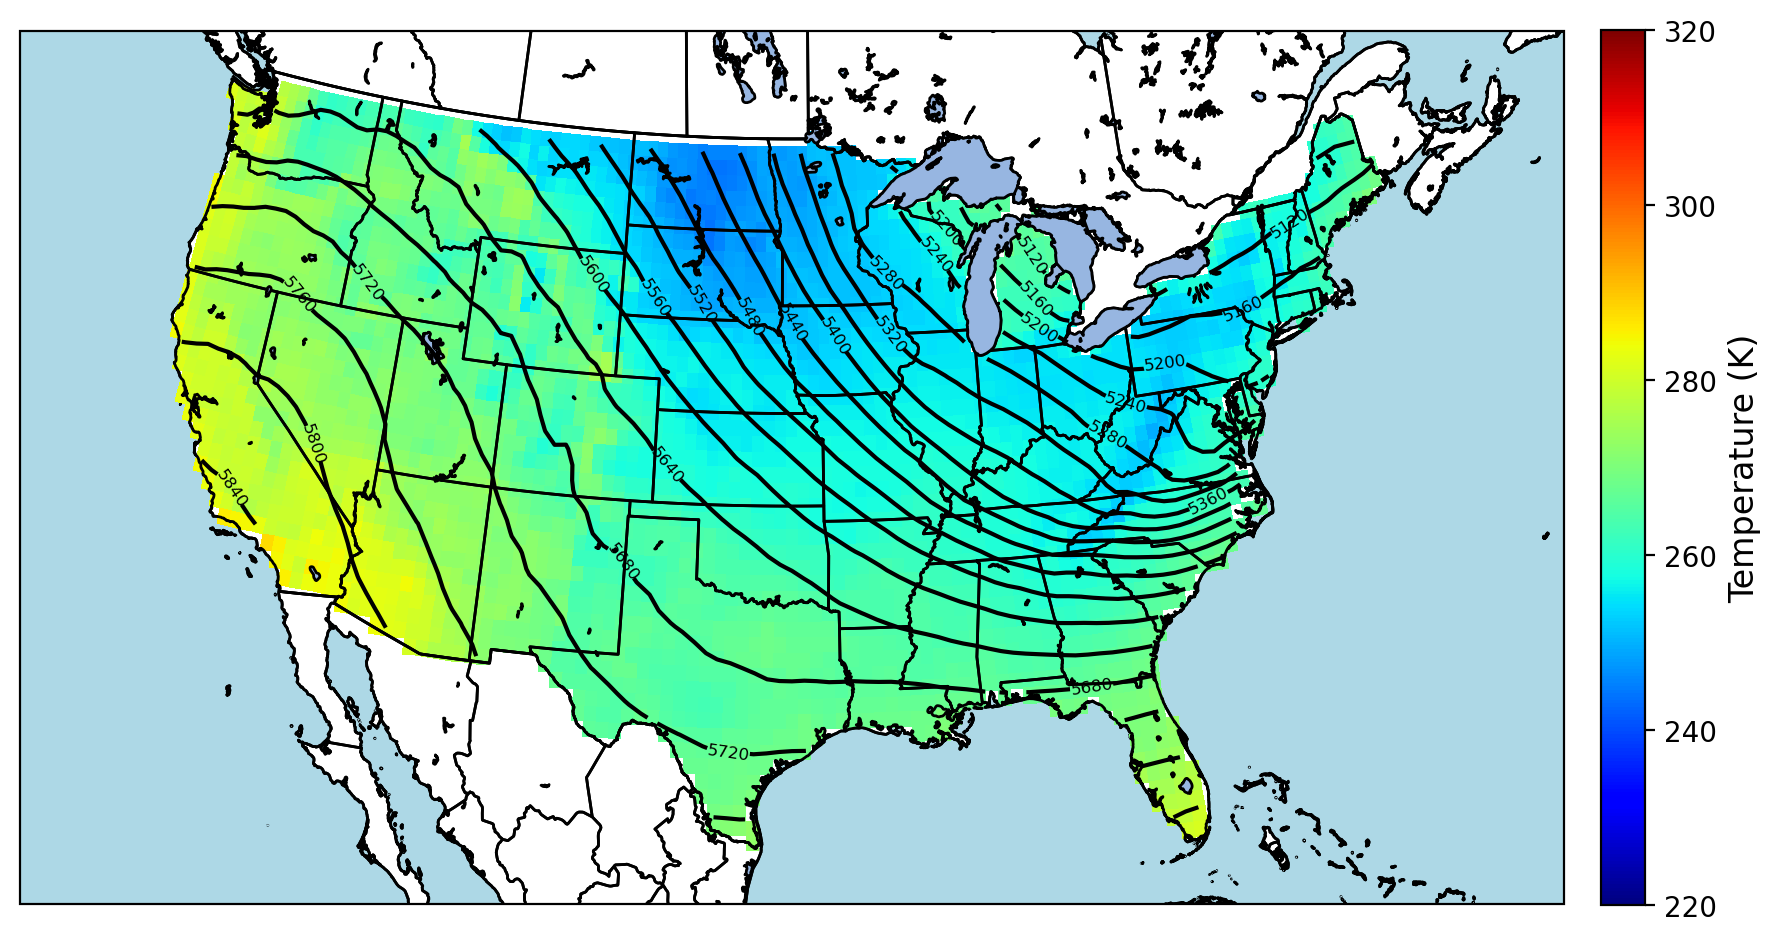

In [200]:
plotting_multiple(t2m_m, gh, lat_m, lon_m, dpi=200, vmin=220, vmax=320, cmap='jet')


# From this, we should have learned how to open a dataset using xarray, inspect it using xarray, 
#utilize the underlying arrays and coordinates to create plots, and utilizes the .where function to create masks!

## Hopefully this was informative!!